# <font color = 'red'> CICLO 1: END TO END </font>

# 0.0. IMPORTS

In [35]:
import random
import math
#import requests
#import pickle
import numpy   as np
import pandas  as pd
#import inflection
import seaborn as sns
#import xgboost as xgb
#import random
import warnings
warnings.filterwarnings( 'ignore' )

#from sklearn.preprocessing import OneHotEnconder
#from tabulate              import tabulate
#from scipy                 import stats  as ss
from scikitplot             import metrics as mt
from sklearn                import metrics as m
from sklearn                import preprocessing   as pp
from keras                  import models          as ml
from keras                  import layers          as l
from sklearn                import model_selection as ms
from matplotlib             import pyplot          as plt
from IPython.display        import Image
from IPython.core.display   import HTML
#from boruta                import BorutaPy
#from sklearn.ensemble      import RandomForestRegressor
#from sklearn.metrics       import mean_absolute_error, mean_squared_error
#from sklearn.linear_model  import LinearRegression, Lasso
#from flask                 import Flask, request, Response

## 0.1. Helper Functions

In [36]:
#def cross_validation( x_training, kfold, model_name, model, verbose = False ) :
#    mae_list = []
#    mape_list = []
#    rmse_list = []
#    
#    
#    for k in reversed( range( 1, kfold+1 ) ):
#        if verbose:
#            print('\nKFold Number: {}'.format (k))
#        # Start and End date for validation
#        validation_start_date = x_training['date'].max() - datetime.timedelta( days=k*6*7)
#        validation_end_date = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7)
#        
#        # Filtering Dataset
#        training = x_training[x_training['date'] < validation_start_date]
#        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]
#        
#        # training and validation dataset
#        # training
#        xtraining = training.drop(['date','sales'], axis = 1)
#        ytraining = training['sales']
#        
#        # validation
#        xvalidation = validation.drop(['date','sales'], axis = 1)
#        yvalidation = validation['sales']
#        
#        
#        # Model
#        m = model.fit(xtraining, ytraining)
#        
#        
#        # Prediction
#        yhat = m.predict(xvalidation)
#        
#        
#        
#        # Performance
#        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )
#        
#        # store performance of each kfold iteration
#        mae_list.append (m_result['MAE'])
#        mape_list.append (m_result['MAPE'])
#        rmse_list.append (m_result['RMSE'])
#        
#    return pd.DataFrame({'Model Name': model_name,
#                         'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
#                         'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
#                         'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index = [0] )
#
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    

#def cramer_v( x, y):
#    cm = pd.crosstab( x, y ).values
#    n = cm.sum()
#    r,k = cm.shape
#    
#    chi2 = ss.chi2_contingency(cm)[0]
#    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
#    
#    kcorr = k - (k-1)**2/(n-1)
#    rcorr = r - (r-1)**2/(n-1)
#    
#    return np.sqrt( (chi2corr/n) / (min(kcorr-1, rcorr-1) ) )
#
#def mean_percentage_error( y,yhat ):
#    return np.mean( ( y-yhat ) / y  )
#
#def mean_absolute_percentage_error( y,yhat ):
#    return np.mean(np.abs( ( y-yhat )/y ) )
#
#
#def ml_error(model_name, y, yhat):
#    mae = mean_absolute_error(y,yhat)
#    mape = mean_absolute_percentage_error(y,yhat)
#    rmse = np.sqrt(mean_squared_error(y,yhat))
#    
#    return pd.DataFrame ({'Model Name': model_name,
#                          'MAE': mae,
#                          'MAPE': mape,
#                          'RMSE': rmse}, index = [0])
#

In [37]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [38]:
df_raw = pd.read_csv('C:/Users/leonardo.faria/repos/airbnb-predict/datasets/training_users.csv', low_memory=True )
df_raw.shape

(213451, 16)

In [39]:
df_sessions = pd.read_csv('C:/Users/leonardo.faria/repos/airbnb-predict/datasets/sessions.csv', low_memory=True )
df_sessions.shape

(10567737, 6)

# 1.0. DESCRIÇÃO DOS DADOS

In [40]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [41]:
print('Number or rows: {}'.format(df1.shape[0] ) )
print('Number or columns: {}'.format(df1.shape[1] ) )

Number or rows: 213451
Number or columns: 16


In [42]:
print('Number or rows: {}'.format(df_sessions.shape[0] ) )
print('Number or columns: {}'.format(df_sessions.shape[1] ) )

Number or rows: 10567737
Number or columns: 6


## 1.2. Data Types

In [43]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [44]:
# Verificar se as colunas estão com os Data Types corretos
df1.sample()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
10811,xhio5os8vx,2011-10-08,20111008002234,2011-10-08,FEMALE,49.0,basic,2,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,US


In [45]:
df_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.3. Check NA

### 1.3.1. Training Users

In [46]:
df1.isna().sum() / len( df1 )

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [47]:
aux = df1[df1['date_first_booking'].isna()]
aux['country_destination'].value_counts( normalize= True )

NDF    1.0
Name: country_destination, dtype: float64

In [48]:
# remove missing value completly
#df1 = df1.dropna()

# date_first_booking
date_first_booking_max = pd.to_datetime( df1['date_first_booking'] ).max().strftime( '%Y-%m-%d' )
df1['date_first_booking'] = df1['date_first_booking'].fillna( date_first_booking_max )

# age
avg_age = df1['age'].mean().astype( np.int64 )
df1['age'] = df1['age'].fillna( avg_age )


# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]


#df1.shape

In [49]:
df1.isna().sum() / len( df1 )

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

### 1.3.2. Sessions

In [50]:
df_sessions.isna().sum() / len( df_sessions )

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [51]:
# remove missing value completly
# user_id
df_sessions = df_sessions[~df_sessions['user_id'].isna()]

# action
df_sessions = df_sessions[~df_sessions['action'].isna()]

# action_type
df_sessions = df_sessions[~df_sessions['action_type'].isna()]

# action_detail
df_sessions = df_sessions[~df_sessions['action_detail'].isna()]

# secs_elapsed
df_sessions = df_sessions[~df_sessions['secs_elapsed'].isna()]


In [52]:
df_sessions.isna().sum() / len( df_sessions )

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

## 1.4. Change Data Types

In [106]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [107]:
# date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format= '%Y%m%d%H%M%S' )


# date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )


# age
df1['age'] = df1['age'].astype( np.int64 )



## 1.5. Check Balanced Data

In [108]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. DATA FILTERING

In [109]:
df2 = df1.copy()

## 2.1. Filtering Rows

## 2.2. Columns Selection Rows

# 3.0. PREPARAÇÃO DOS DADOS

In [110]:
df3 = df2.copy()

In [111]:
# dummy variable
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df3 = pd.concat( [df3[['id', 'country_destination']], df3_dummy], axis=1 )

# 4.0. FEATURE SELECTION

In [112]:
df4 = df3.copy()

In [113]:
# Drop de colunas date porque sao irrelevantes ao projeto
cols_drop = ['date_account_created','timestamp_first_active','date_first_booking'] # original dates
df4 = df3.drop( cols_drop, axis= 1 )

In [114]:
X = df4.drop( 'country_destination', axis=1 )
y = df4['country_destination'].copy()

In [115]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

# 5.0. MACHINE LEARNING MODEL

In [116]:
x_train = X_train.drop( 'id', axis=1 )
x_test = X_test.drop( 'id', axis=1 )

In [120]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().to_list()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts( normalize=True ).sort_index().tolist()

# Random model

yhat_random = random.choices( population=country_destination_list,
                              weights=country_destination_weights,
                              k=k_num )
len( yhat_random )

13635

## 5.1. Baseline Model

Accuracy: 0.5162449578291163
Balanced Accuracy: 0.09112806920208301
Kappa Score: -0.005394881363820714
              precision    recall  f1-score   support

          AU       0.01      0.01      0.01       101
          CA       0.01      0.01      0.01       214
          DE       0.01      0.01      0.01       170
          ES       0.02      0.02      0.02       345
          FR       0.04      0.04      0.04       710
          GB       0.01      0.01      0.01       344
          IT       0.03      0.03      0.03       423
          NL       0.02      0.02      0.02       128
          PT       0.03      0.03      0.03        36
          US       0.70      0.71      0.71      9624
       other       0.11      0.11      0.11      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.51      0.52      0.52     13635



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

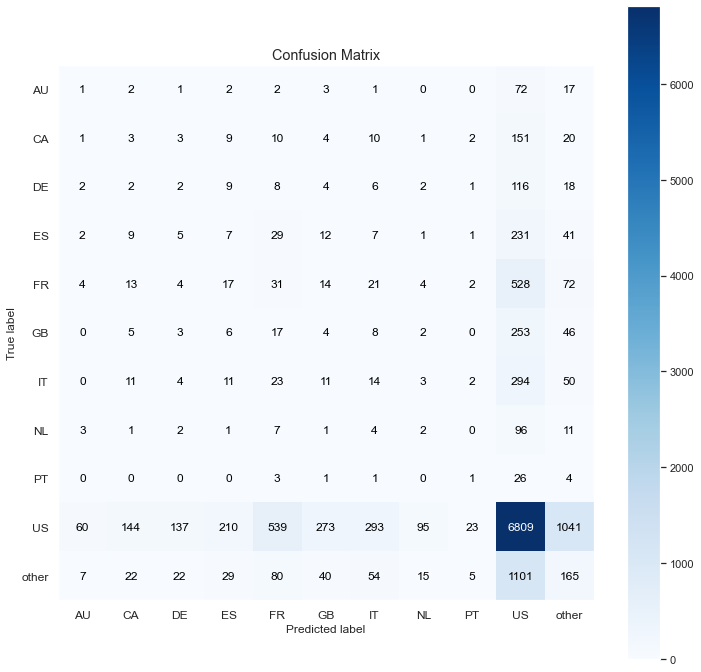

In [122]:
# Accuracy
acc_random = m.accuracy_score( y_test, yhat_random )
print( 'Accuracy: {}'.format( acc_random ) )

# Balanced Accuracy
balanced_acc_random = m.balanced_accuracy_score( y_test, yhat_random )
print( 'Balanced Accuracy: {}'.format( balanced_acc_random ) )

# Kappa Metrics
kappa_random = m.cohen_kappa_score( y_test, yhat_random )
print( 'Kappa Score: {}'.format( kappa_random ) )

# Classification report
print( m.classification_report( y_test, yhat_random ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_random, normalize=False, figsize=(12,12) )

## 5.2. Neural Network - MLP

In [123]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [124]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [125]:
x_train.shape[1]

112

In [126]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim = x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax' ) )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2889 - accuracy: 0.7053
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2360 - accuracy: 0.7083
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2123 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1863 - accuracy: 0.7088
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1686 - accuracy: 0.7084
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1587 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1494 - accuracy: 0.7088
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1430 - accuracy: 0.7088
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1393 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================] - 2s 1ms/step - l

### 5.2.1. NN PERFORMANCE

In [127]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape( 1,-1 )[0]


In [128]:
m.balanced_accuracy_score( y_test_nn, yhat_nn )

0.0917896683372866

Accuracy: 0.703997066373304
Balanced Accuracy: 0.0917896683372866
Kappa Score: 0.0017230393787712739
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.33      0.01      0.01       170
          ES       0.00      0.00      0.00       345
          FR       0.18      0.00      0.01       710
          GB       0.00      0.00      0.00       344
          IT       0.17      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.14      0.00      0.00      1540

    accuracy                           0.70     13635
   macro avg       0.14      0.09      0.08     13635
weighted avg       0.53      0.70      0.58     13635



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

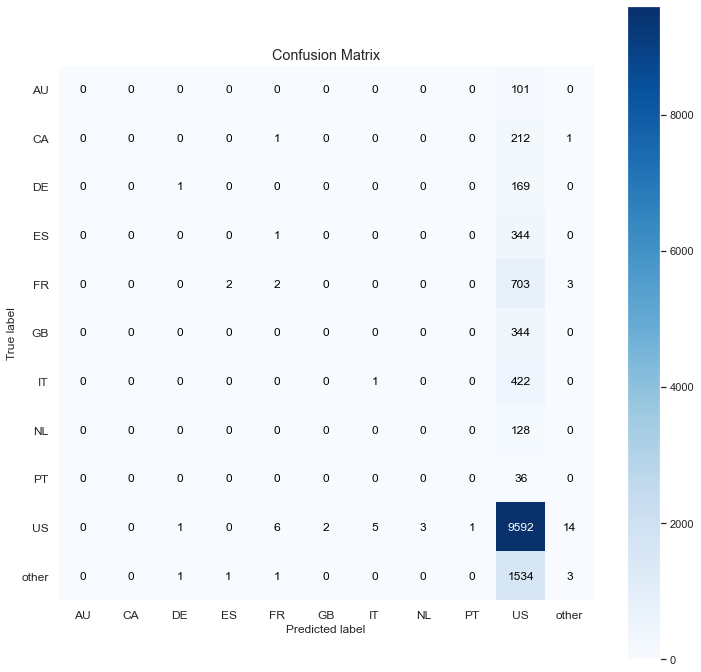

In [129]:
# Accuracy
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print( 'Accuracy: {}'.format( acc_nn ) )

# Balanced Accuracy
balanced_acc_nn = m.balanced_accuracy_score( y_test_nn, yhat_nn )
print( 'Balanced Accuracy: {}'.format( balanced_acc_nn ) )

# Kappa Metrics
kappa_nn = m.cohen_kappa_score( y_test_nn, yhat_nn )
print( 'Kappa Score: {}'.format( kappa_nn ) )

# Classification report
print( m.classification_report( y_test_nn, yhat_nn ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12) )

### 5.2.2 NN PERFORMANCE - Cross Validation

In [131]:
# generate k-dfold
num_folds = 5
kfold = ms.StratifiedKFold( n_splits=num_folds, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_acc_list = []

i = 1
for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_folds) )
    
    # get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # target hot-encondig
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform( y_train_fold.values.reshape( -1, 1 ) ).toarray()
    

    # model definition
    model = ml.Sequential()
    model.add( l.Dense( 256, input_dim=x_train.shape[1], activation='relu' ) )
    model.add( l.Dense( 11, activation='softmax' ) )

    # compile model
    model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

    # trainijg model
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0 )

    # prediction
    pred_nn = model.predict( x_val_fold )
    yhat_nn = ohe.inverse_transform( pred_nn )
    
    # prepare data
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape( 1, -1)[0]

    # metrics
    ## Balanced Accuracy
    balanced_acc_nn = m.balanced_accuracy_score( y_test_nn, yhat_nn )
    balanced_acc_list.append( balanced_acc_nn )
    
    ## KappaMetrics
    kappa_acc_nn = m.cohen_kappa_score( y_test_nn, yhat_nn )
    kappa_acc_list.append( kappa_acc_nn )
    
    i = i + 1
    

Fold Number: 1
Fold Number: 2
Fold Number: 3
Fold Number: 4
Fold Number: 5


In [134]:
print( 'Avg Balanced Accuracy: {} +/- {}'.format( np.round( np.mean( balanced_acc_list ), 2 ), 
                                                 np.round( np.std( balanced_acc_list ), 4 ) ) )
print( 'Avg Kappa: {} +/- {}'.format( np.round( np.mean( kappa_acc_list ), 3 ), 
                                                 np.round( np.std( kappa_acc_list ), 4 ) ) )

SyntaxError: invalid syntax (<ipython-input-134-dae1605df57a>, line 2)